# Neural network

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import pandas as pd
import scipy.optimize as opt
#This package is the evaluation report
from sklearn.metrics import classification_report

In [111]:
def load_data(path,transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')   #(5000,1)
    y = y.reshape(y.shape[0]) #make it back to column vector
    
    X = data.get('X')  #(5000,400)
    
    if transpose:
        #for this dataset,you need a transpose to get the orientation right
        X = np.array([im.reshape((20,20)).T for im in X])
        print(X.shape)
        #and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])
        print(X.shape)
    return X,y

In [112]:
X, y = load_data('ex3data1.mat')
print(X.sum())
print(X.shape,type(X))
print(y.shape,y.sum())

(5000, 20, 20)
(5000, 400)
262678.26016
(5000, 400) <class 'numpy.ndarray'>
(5000,) 27500


In [113]:
def plot_an_image(image):
    """
    image:(400,)
    """
    fig,ax = plt.subplots(figsize=(1,1))
    #matshow　Draw matrix as image
    ax.matshow(image.reshape((20,20)),cmap=matplotlib.cm.binary)
    plt.xticks(np.array([])) #just get rid of ticks
    plt.yticks(np.array([]))

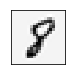

this should be 8


In [114]:
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one,:])
plt.show()
print('this should be {}'.format(y[pick_one]))

In [115]:
def plot_100_image(X):
    """
    sample 100 image and show them assume the image is square
    X : (5000,400)
    """
    size = int(np.sqrt(X.shape[1]))
    #sample 100 image,reshape,reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]),100)#100*400
    #print(sample_idx,type(sample_idx))
    sample_images = X[sample_idx,:]
    #print(sample_images,type(sample_images))
    fig, ax_array = plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(8,8))
    
    for r in range(10):
        for c in range(10):
            ax_array[r,c].matshow(sample_images[10*r+c].reshape((size,size)),
                                 cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

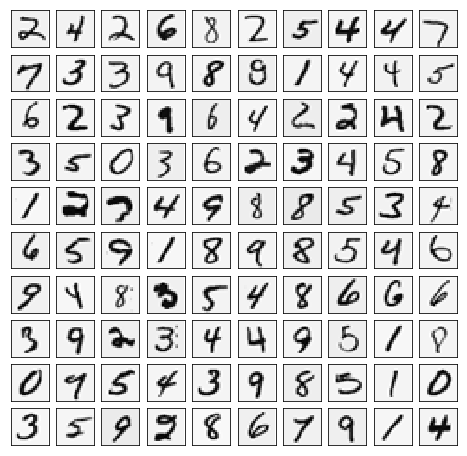

In [116]:
plot_100_image(X)
plt.show()

In [118]:
#这种加载数据的方式和sio.loadmat()结果是不一样的
raw_X, raw_y = load_data('ex3data1.mat')
print('sdk')
print(raw_X.shape)
print(raw_y.shape)

(5000, 20, 20)
(5000, 400)
sdk
(5000, 400)
(5000,)


# Preparing Data

In [120]:
#add intercept=1 for x0
X = np.hstack((np.ones((raw_X.shape[0],1)),raw_X))
#Another way插入了第一列（全部为1）
#X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)
X.shape
X.shape

(5000, 401)